In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
x = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_x.csv")

In [ ]:
x.head()

,0.07184119218267622,0.8553524138064769,-0.3055966142959303,0.028252569993086545,1.8268953710701943
0,0.139521,-0.423507,0.461059,-0.447400,-0.034988
1,1.626311,-0.257622,-0.697520,1.413219,1.086292
2,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
3,-0.783365,-0.861232,0.951448,-0.117306,0.680597
4,3.077357,0.948615,-0.295527,1.390358,-0.116174


In [ ]:
x = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_x.csv",
                header=None)
y = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_y.csv",
                header=None)

In [ ]:
print(x.shape, y.shape)

(387, 5) (387, 1)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
binary = LinearRegression()

In [ ]:
binary.fit(x[[1]], y)

LinearRegression()

In [ ]:
binary.coef_

array([[95.52010745]])

In [ ]:
binary.predict(x[[1]])

array([[  81.7066754 ],
       [ -40.45008468],
       [ -24.60472955],
       [ -78.92903986],
       [ -82.26167214],
       [  90.61516808],
       [   3.20559483],
       [ -27.39642608],
       [  77.03125467],
       [ -81.79074091],
       [ -57.11517633],
       [  71.55969853],
       [ -51.83704209],
       [  13.20326205],
       [ -20.052765  ],
       [ 125.1294343 ],
       [ -85.37964253],
       [ -67.97795874],
       [  62.50833807],
       [  67.06343892],
       [ -62.27425459],
       [ -80.86610767],
       [ -27.05138056],
       [ -52.78366471],
       [  35.41921651],
       [ -79.36741675],
       [  56.64287014],
       [  79.27353864],
       [ -35.49555901],
       [-221.02386024],
       [ -80.76607115],
       [ 165.15522994],
       [  32.58309404],
       [ -35.52849481],
       [ -96.01738449],
       [ -42.18812152],
       [ -48.92932082],
       [ -75.29745421],
       [  14.5207672 ],
       [  38.22303712],
       [  -5.81538928],
       [ -10.783

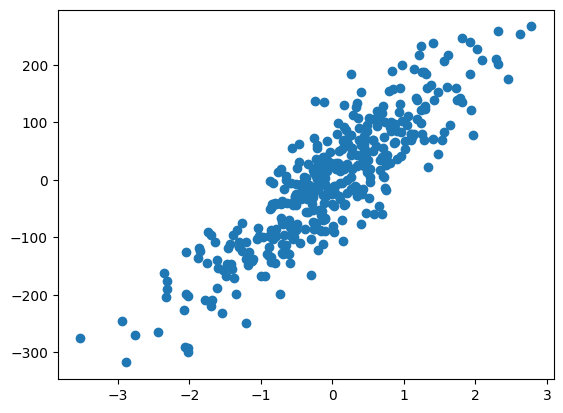

In [ ]:
plt.scatter(x[1], y)

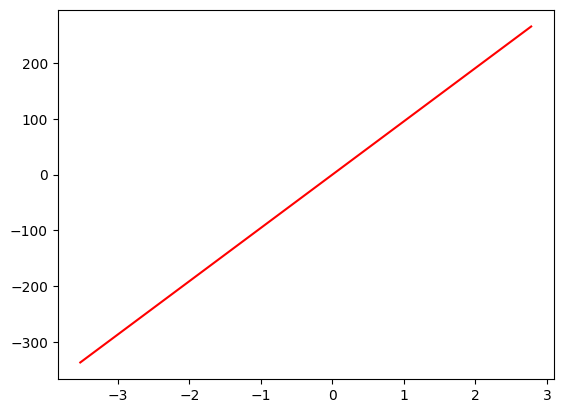

In [ ]:
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

In [ ]:
from sklearn.metrics import r2_score

y_pred = binary.predict(x[[1]])

r2_score(y_pred, y)

0.7012554014321936

In [ ]:
multiple = LinearRegression()
multiple.fit(x, y)
multiple.score(x, y)

0.9922198026415868

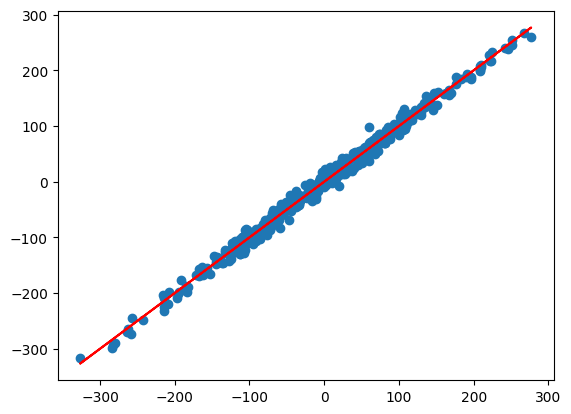

In [ ]:
y_pred = multiple.predict(x)
plt.scatter(y_pred, y)
plt.plot(y_pred, y_pred, c='r')

**Задания для самостоятельного выполнения**

Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.


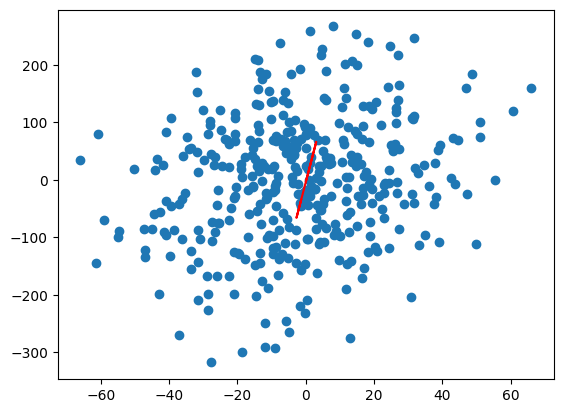

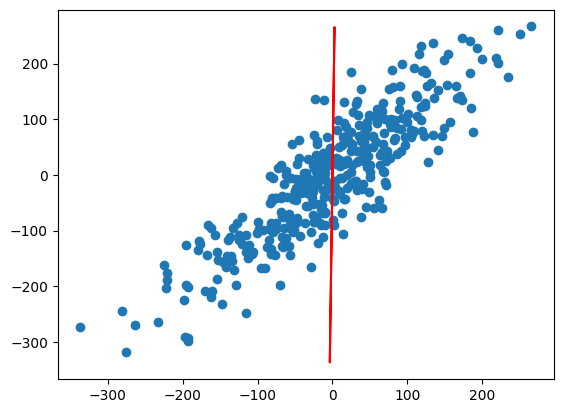

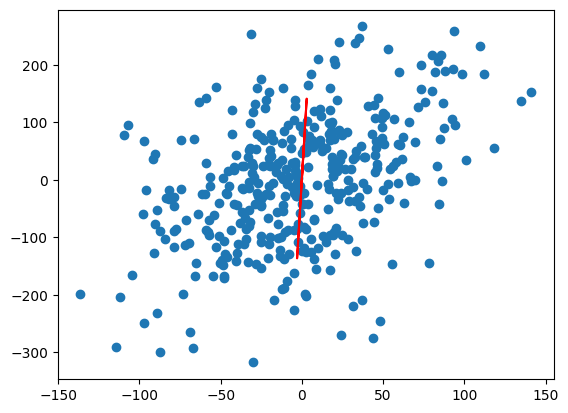

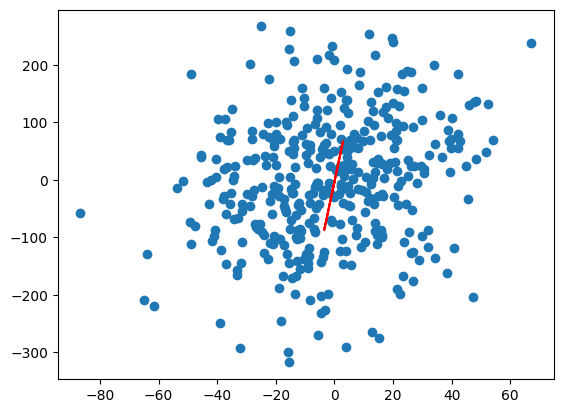

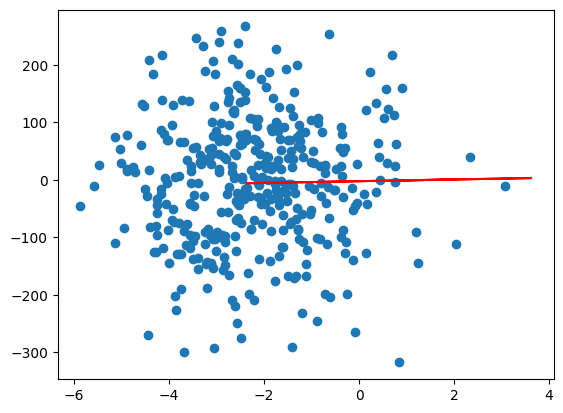

[-20.912991717999002,
 0.7012554014321936,
 -3.320697452995188,
 -19.065782984969072,
 -5820.026084330957]

In [ ]:
score = []

for i in range(5):
  binary = LinearRegression()
  binary.fit(x[[i]], y)
  y_pred = binary.predict(x[[i]])
  score.append(r2_score(y_pred, y))
  plt.scatter(y_pred, y)
  plt.plot(x[[i]], y_pred, c='r')
  plt.show()

score

Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.


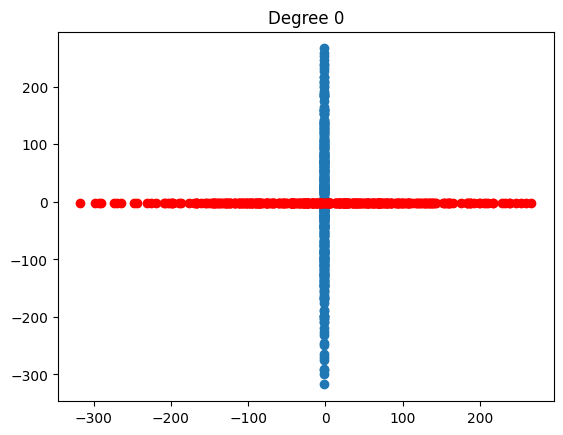

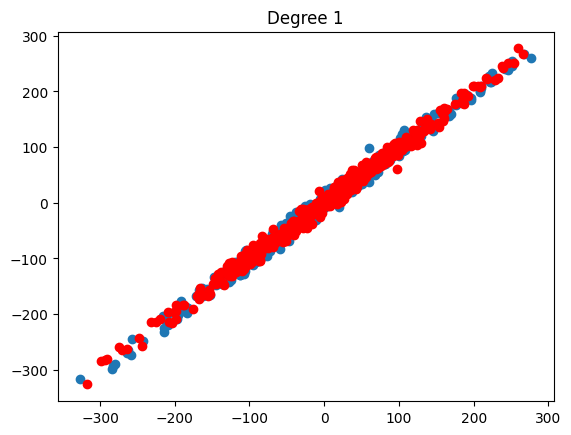

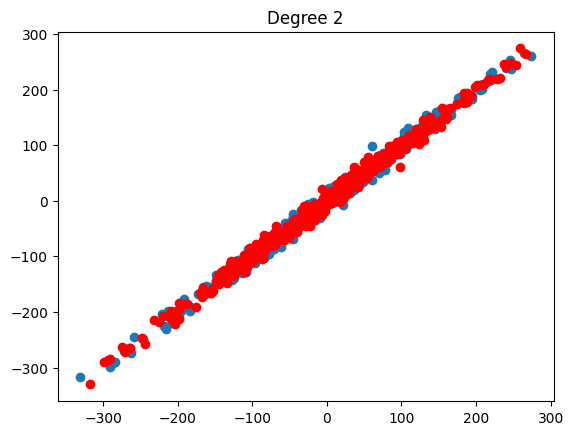

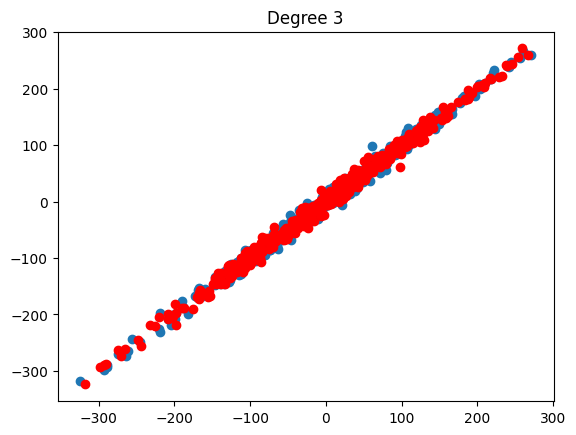

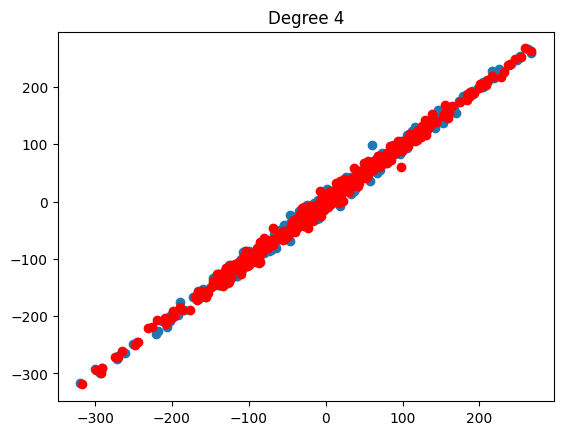

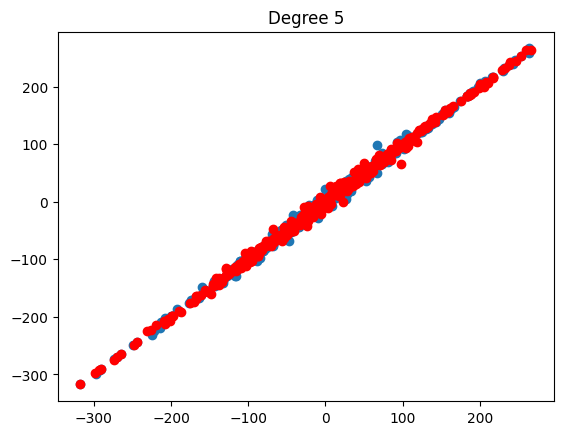

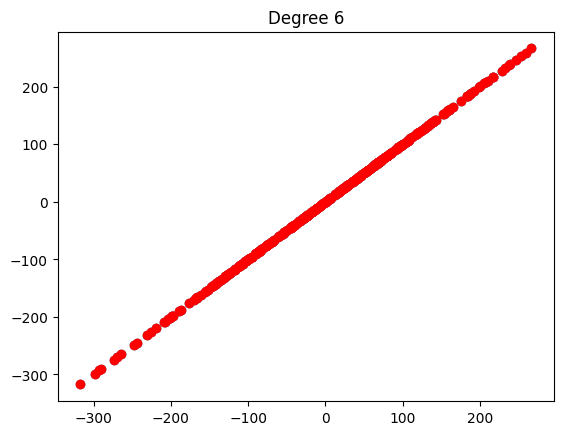

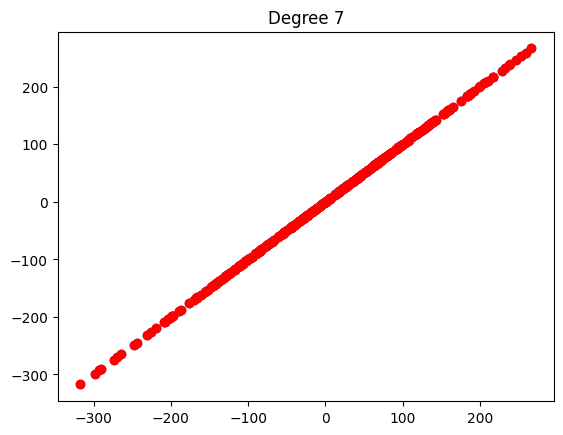

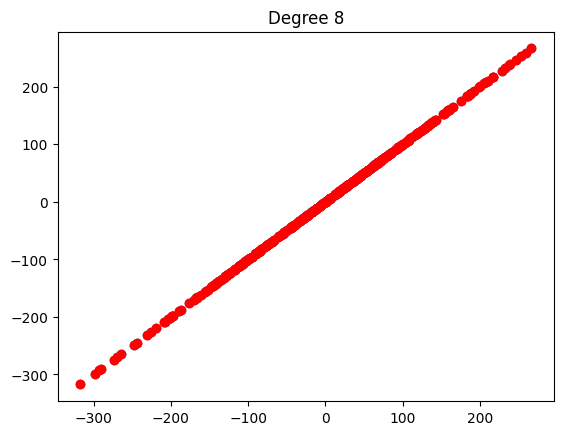

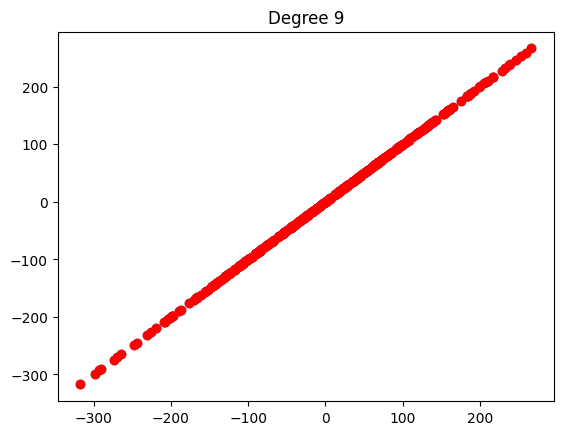

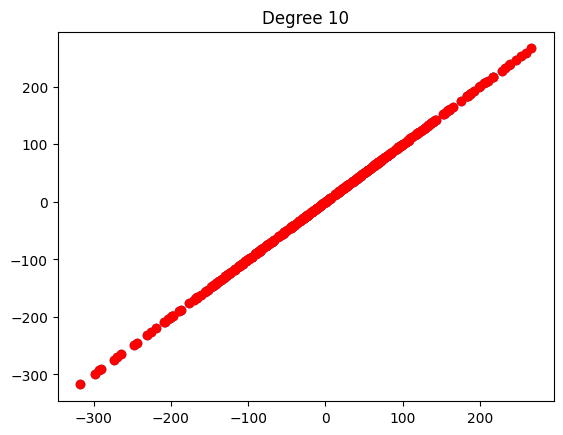

    Degree  Duration  R2_Score  Model_Score           MSE
0        0  0.020805  0.000000     0.000000  1.201670e+04
1        1  0.016212  0.992159     0.992220  9.349229e+01
2        2  0.025596  0.992545     0.992600  8.891857e+01
3        3  0.041636  0.993146     0.993192  8.180684e+01
4        4  0.059177  0.994335     0.994367  6.769318e+01
5        5  0.069883  0.997224     0.997232  3.326649e+01
6        6  0.206876  1.000000     1.000000  6.751457e-23
7        7  0.240104  1.000000     1.000000  2.217778e-22
8        8  0.434328  1.000000     1.000000  2.491462e-21
9        9  0.147482  1.000000     1.000000  2.418734e-20
10      10  0.241320  1.000000     1.000000  3.293677e-19


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import time
import pandas as pd

results = []

for i in range(11):
    start = time.time()

    poly = PolynomialFeatures(degree=i)
    X_poly = poly.fit_transform(x)
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)

    duration = time.time() - start
    r2 = r2_score(y_pred, y)
    score = model.score(X_poly, y)
    mse = mean_squared_error(y_pred, y)

    results.append([i, duration, r2, score, mse])

    plt.scatter(y_pred, y)
    plt.scatter(y, y_pred, c='r')
    plt.title(f"Degree {i}")
    plt.show()

df = pd.DataFrame(results, columns=["Degree", "Duration", "R2_Score", "Model_Score", "MSE"])
print(df)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class Model(object):
    def __init__(self):
        self.b = None

    def predict(self, X):
        return X.dot(self.b)

    def error(self, X, Y):
        m = len(Y)
        return np.sum((self.predict(X) - Y) ** 2) / (2 * m)

    def fit(self, X, Y, lr=0.001, accuracy=1e-6, max_steps=5000):
        m, n = X.shape
        X_ext = np.hstack((np.ones((m, 1)), X))
        self.b = np.zeros(n+1)
        prev_err = float('inf')

        for _ in range(max_steps):
            predictions = self.predict(X_ext)
            error = predictions - Y
            gradients = X_ext.T.dot(error) / m

            self.b -= lr * gradients

            curr_err = self.error(X_ext, Y)
            if abs(curr_err - prev_err) < accuracy:
                break

            prev_err = curr_err

        return self.b

    def plot(self, X, Y):
        plt.scatter(X[:, 0], Y)
        plt.plot(X[:, 0], self.predict(np.hstack((np.ones((X.shape[0], 1)), X))), color='red')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.show()


In [ ]:

model = Model()
model.fit(x_np, y_np)

y_pred = model.predict(np.hstack((np.ones((x_np.shape[0], 1)), x_np)))
error = model.error(np.hstack((np.ones((x_np.shape[0], 1)), x_np)), y_np)
print(error)


47.075376283778546


In [ ]:
x


array([[ 0.07184119,  0.85535241, -0.30559661,  0.02825257,  1.82689537],
       [ 0.13952145, -0.4235067 ,  0.46105901, -0.44739997, -0.0349876 ],
       [ 1.62631129, -0.25762168, -0.69751964,  1.41321919,  1.08629198],
       ...,
       [-0.45714054,  0.94079115, -0.66026956,  2.32565802, -1.51005492],
       [-0.34427771, -1.20980548, -2.1197209 , -1.48590721, -0.16768876],
       [-1.34911367,  0.71560526,  1.27304466, -0.78278895,  0.6837194 ]])